In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  
import seaborn as sns
from scipy import stats
import datetime as datetime

world_energy_supply = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/World Energy Supply-Table 1.csv',sep=';',decimal=',')
world_electricity_supply = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/World Electricity-Table 1.csv',sep=';',decimal=',')

In [804]:
world_energy_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Publication                            38 non-null     object 
 1   Scenario                               38 non-null     object 
 2   Category                               37 non-null     object 
 3   Product                                37 non-null     object 
 4   Flow                                   37 non-null     object 
 5   Unit                                   37 non-null     object 
 6   Region                                 37 non-null     object 
 7   Year                                   37 non-null     float64
 8   Unnamed: 8                             0 non-null      float64
 9   Unnamed: 9                             40 non-null     object 
 10  Stated Policies Scenario               40 non-null     object 
 11  Stated P

In [805]:
world_energy_supply.head(50)  

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Net Zero Emissions by 2050 Scenario.2,Net Zero Emissions by 2050 Scenario.3,Net Zero Emissions by 2050 Scenario.4,Unnamed: 43,NO.10,NO.11,NO.12,Unnamed: 47,NO.13,NO.14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2035,2040,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy supply: World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,NZE,NZE,NZE,NaN,NaN,NaN,NaN,NaN,7,27
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Shares (%),NaN,NaN,NaN,CAAGR (%)\n2023 to:,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2035,2040,2050,NaN,2023,2030,2050,NaN,2030,2050
6,GEC2024,1,Energy,Total,Total energy supply,EJ,World,2.0,NaN,Total energy supply,...,544,538,564,NaN,100,100,100,NaN,-1,-0
7,GEC2024,1,Energy,Renewables,Total energy supply,EJ,World,2.0,NaN,Renewables,...,245,312,399,NaN,12,28,71,NaN,11,6
8,GEC2024,1,Energy,Solar,Total energy supply,EJ,World,2.0,NaN,Solar,...,72,104,145,NaN,1,6,26,NaN,26,11
9,GEC2024,1,Energy,Wind,Total energy supply,EJ,World,2.0,NaN,Wind,...,45,62,86,NaN,1,4,15,NaN,17,9


In [ ]:

world_energy_supply = world_energy_supply.dropna(how="all")  # Drops rows where all values are NaN
world_energy_supply = world_energy_supply.dropna(axis=1, how="all")  # Drops columns where all values are NaN
# Drop the specified columns
world_energy_supply = world_energy_supply.drop(columns=["Publication", "Scenario", "Category", "Flow", "Region", "Year", "Unnamed: 9", "Unnamed: 24", "NO", "NO.1", "NO.2", "NO.3", "NO.4", "NO.5",	"NO.6",	"NO.7",	"NO.8",	"NO.9", "NO.10",	"NO.11",	"NO.12",	"NO.13",	"NO.14"])
world_energy_supply.fillna(0, inplace=True)
# Drop multiple rows by index
world_energy_supply = world_energy_supply.drop(index=[0,1,2,3,4])  


# Reset index after dropping the row 
world_energy_supply = world_energy_supply.reset_index(drop=True)

world_energy_supply.head(20)


,Product,Unit,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Stated Policies Scenario.6,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2,Announced Pledges Scenario.3,Announced Pledges Scenario.4,Net Zero Emissions by 2050 Scenario,Net Zero Emissions by 2050 Scenario.1,Net Zero Emissions by 2050 Scenario.2,Net Zero Emissions by 2050 Scenario.3,Net Zero Emissions by 2050 Scenario.4
0,0,0,2010,2022,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050
1,Total,EJ,536,629,642,676,682,691,722,642,641,624,620,635,642,588,544,538,564
2,Renewables,EJ,43,74,78,120,153,185,241,78,140,197,251,336,78,165,245,312,399
3,Solar,EJ,1,6,8,26,42,58,84,8,31,55,81,120,8,38,72,104,145
4,Wind,EJ,1,8,8,18,27,34,44,8,21,34,46,66,8,26,45,62,86
5,Hydro,EJ,12,16,15,17,19,20,23,15,18,20,22,25,15,19,22,25,28
6,Modern bioenergy: solid,EJ,23,34,36,44,46,49,56,36,48,56,64,73,36,53,64,71,76
7,Modern bioenergy: liquid,EJ,2,4,5,6,6,7,8,5,10,12,14,14,5,12,14,14,12
8,Modern bioenergy: gas,EJ,1,1,1,2,3,5,8,1,4,6,8,12,1,6,9,11,12
9,Traditional use of biomass,EJ,21,19,19,15,13,12,10,19,6,5,3,2,19,-,-,-,-


In [807]:
# Define new column names
new_column_names = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2040",
    "Stated Policies Scenario.6": "SPS 2050",
    "Announced Pledges Scenario": "APS 2023",
    "Announced Pledges Scenario.1": "APS 2030",
    "Announced Pledges Scenario.2": "APS 2035",
    "Announced Pledges Scenario.3": "APS 2040",
    "Announced Pledges Scenario.4": "APS 2050",
    "Net Zero Emissions by 2050 Scenario": "NZE 2023",
    "Net Zero Emissions by 2050 Scenario.1": "NZE 2030",
    "Net Zero Emissions by 2050 Scenario.2": "NZE 2035",
    "Net Zero Emissions by 2050 Scenario.3": "NZE 2040",
    "Net Zero Emissions by 2050 Scenario.4": "NZE 2050"
}

# Rename the columns
world_energy_supply.rename(columns=new_column_names, inplace=True)
world_energy_supply = world_energy_supply.drop(index=[0])  
# Display the cleaned DataFrame
world_energy_supply.head(10)

,Product,Unit,SPS 2010,SPS 2022,SPS 2023,SPS 2030,SPS 2035,SPS 2040,SPS 2050,APS 2023,APS 2030,APS 2035,APS 2040,APS 2050,NZE 2023,NZE 2030,NZE 2035,NZE 2040,NZE 2050
1,Total,EJ,536,629,642,676,682,691,722,642,641,624,620,635,642,588,544,538,564
2,Renewables,EJ,43,74,78,120,153,185,241,78,140,197,251,336,78,165,245,312,399
3,Solar,EJ,1,6,8,26,42,58,84,8,31,55,81,120,8,38,72,104,145
4,Wind,EJ,1,8,8,18,27,34,44,8,21,34,46,66,8,26,45,62,86
5,Hydro,EJ,12,16,15,17,19,20,23,15,18,20,22,25,15,19,22,25,28
6,Modern bioenergy: solid,EJ,23,34,36,44,46,49,56,36,48,56,64,73,36,53,64,71,76
7,Modern bioenergy: liquid,EJ,2,4,5,6,6,7,8,5,10,12,14,14,5,12,14,14,12
8,Modern bioenergy: gas,EJ,1,1,1,2,3,5,8,1,4,6,8,12,1,6,9,11,12
9,Traditional use of biomass,EJ,21,19,19,15,13,12,10,19,6,5,3,2,19,-,-,-,-
10,Nuclear,EJ,30,29,30,36,41,45,49,30,39,49,59,69,30,44,59,70,78


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/248729702.py:46: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


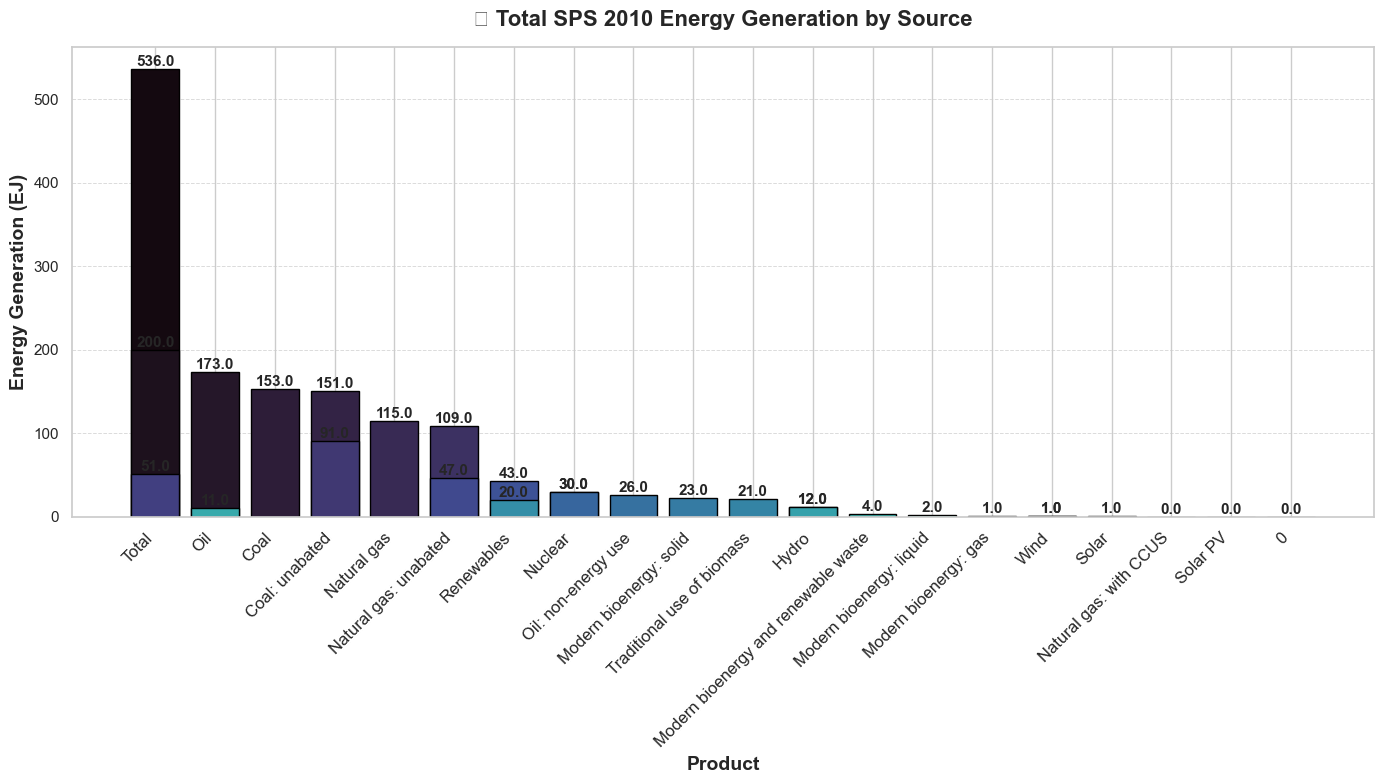

In [ ]:

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Convert 'SPS 2010' column to numeric
world_energy_supply["SPS 2010"] = pd.to_numeric(world_energy_supply["SPS 2010"], errors='coerce')

# Drop NaN values
world_energy_supply = world_energy_supply.dropna(subset=["SPS 2010"])

# Sort values for better visualization
world_energy_supply = world_energy_supply.sort_values(by="SPS 2010", ascending=False)

# Create figure
plt.figure(figsize=(14, 8))

# Use a modern color palette
colors = sns.color_palette("mako", len(world_energy_supply))

# Plot bar chart
bars = plt.bar(world_energy_supply["Product"], world_energy_supply["SPS 2010"], color=colors, edgecolor="black")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
plt.xlabel("Product", fontsize=14, fontweight="bold")
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight="bold")
plt.title("⚡ Total SPS 2010 Energy Generation by Source", fontsize=16, fontweight="bold", pad=15)

# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right', fontsize=12)

# Subtle horizontal grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()

plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/4233941650.py:46: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


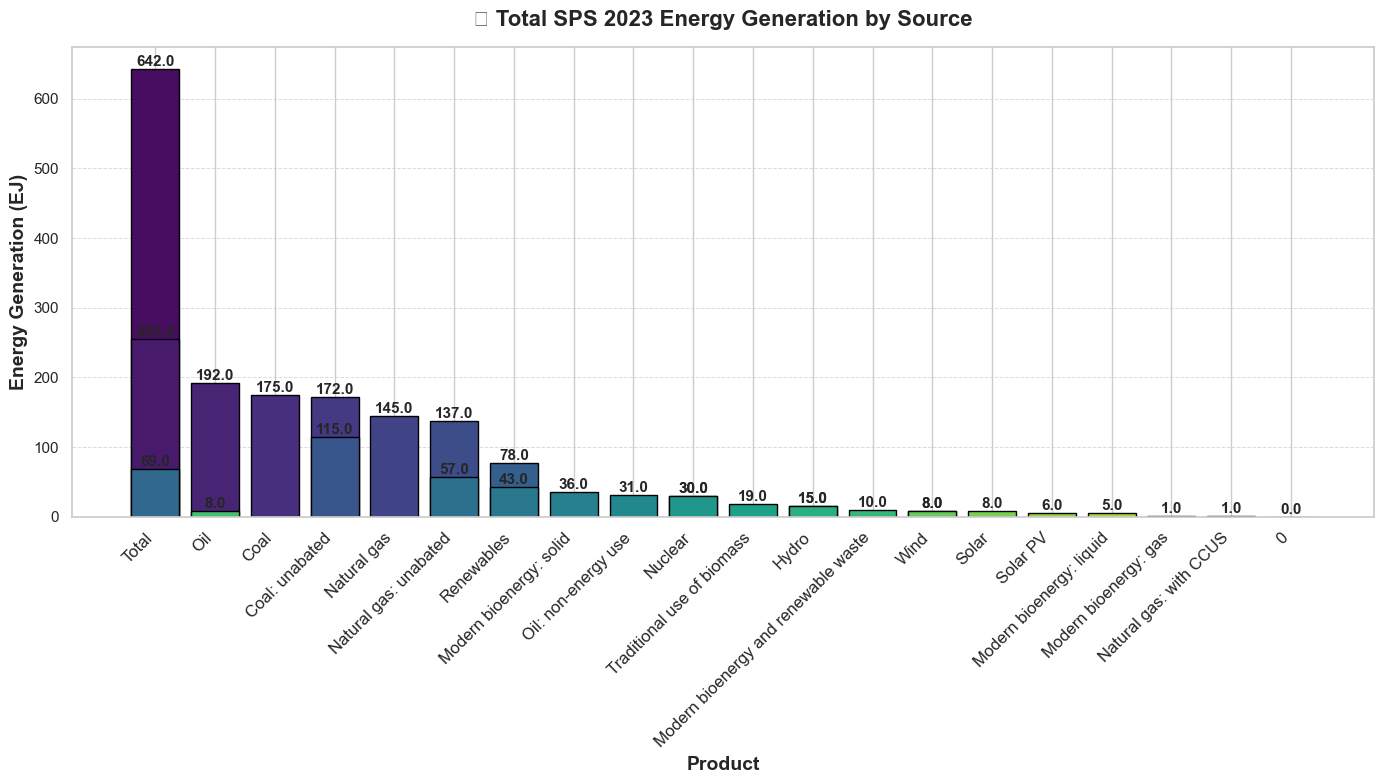

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Convert 'SPS 2023' column to numeric
world_energy_supply["SPS 2023"] = pd.to_numeric(world_energy_supply["SPS 2023"], errors='coerce')

# Drop NaN values (if any)
world_energy_supply = world_energy_supply.dropna(subset=["SPS 2023"])

# Sort by energy generation for better visual hierarchy
world_energy_supply = world_energy_supply.sort_values(by="SPS 2023", ascending=False)

# Create figure
plt.figure(figsize=(14, 8))

# Use a modern color palette
colors = sns.color_palette("viridis", len(world_energy_supply))

# Plot bar chart
bars = plt.bar(world_energy_supply["Product"], world_energy_supply["SPS 2023"], color=colors, edgecolor="black")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
plt.xlabel("Product", fontsize=14, fontweight="bold")
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight="bold")
plt.title("⚡ Total SPS 2023 Energy Generation by Source", fontsize=16, fontweight="bold", pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Subtle horizontal grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


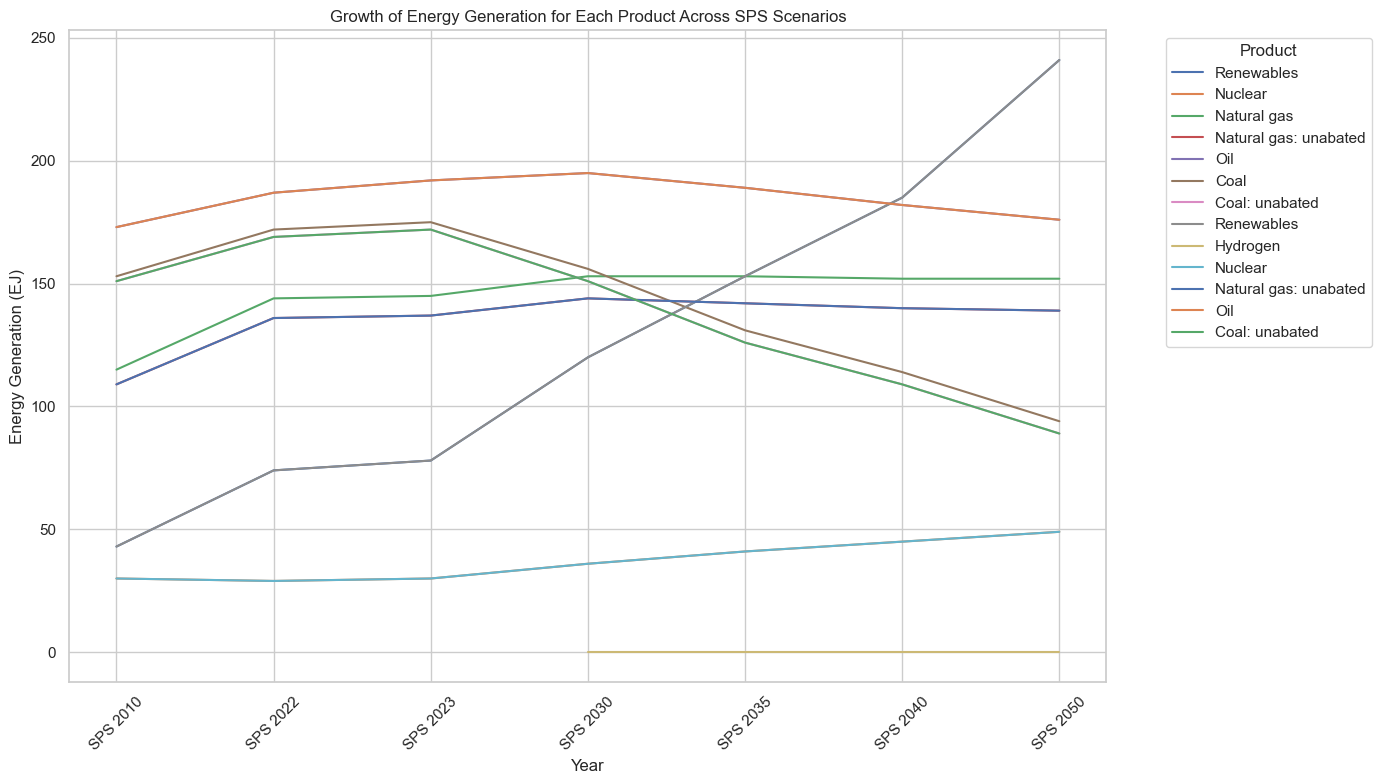

In [810]:
# Define the rows to exclude
exclude_rows = [
    "Modern bioenergy: solid", "Modern bioenergy: liquid", "Modern bioenergy: gas", 
    "Traditional use of biomass", "Natural gas: with CCUS", "Oil: non-energy use", 
    "Coal: with CCUS", "Total", "Hydrogen: low-emissions", "Hydrogen: high-emissions", "0", "Modern bioenergy and renewable waste", "Ammonia","Solar", "Wind", "Hydro", "Solar PV", "Wind"
]

# Filter out the rows to be excluded
df_filtered = df_growth[~df_growth["Product"].isin(exclude_rows)]

# Plotting
plt.figure(figsize=(14, 8))

# Loop through each product and plot its growth across the years
for product in df_filtered["Product"]:
    product_data = df_filtered[df_filtered["Product"] == product]
    plt.plot(product_data.columns[1:], product_data.iloc[0, 1:], label=product)

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy Generation (EJ)")
plt.title("Growth of Energy Generation for Each Product Across SPS Scenarios")
plt.xticks(rotation=45)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/1978280661.py:69: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


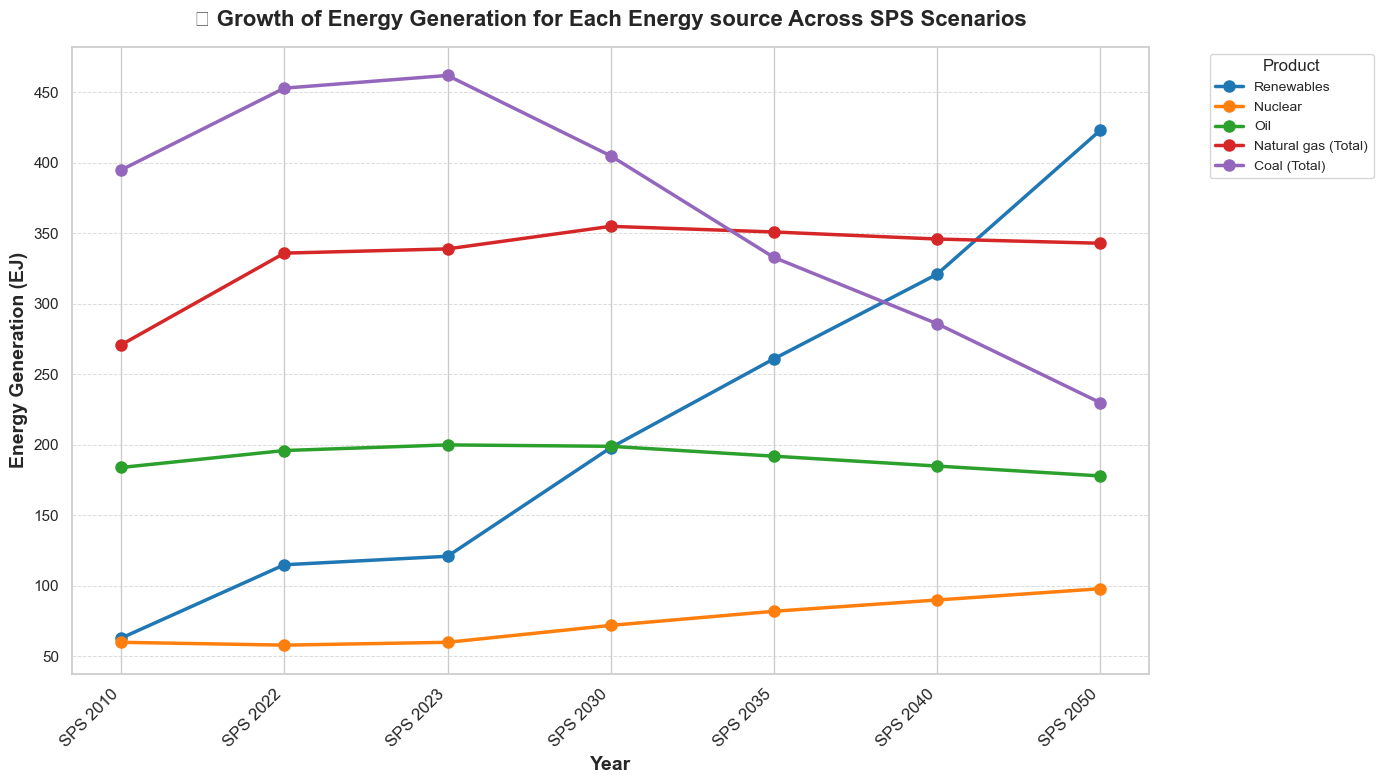

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Ensure all numeric columns are treated as numbers
df_growth.iloc[:, 1:] = df_growth.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Strip spaces from "Product" names
df_growth["Product"] = df_growth["Product"].str.strip()

# Define rows to exclude
exclude_rows = [
    "Modern bioenergy: solid", "Modern bioenergy: liquid", "Modern bioenergy: gas", 
    "Traditional use of biomass", "Natural gas: with CCUS", "Oil: non-energy use", 
    "Coal: with CCUS", "Total", "Hydrogen: low-emissions", "Hydrogen: high-emissions", 
    "0", "Modern bioenergy and renewable waste", "Ammonia", "Solar", "Wind", "Hydro", "Hydrogen",
    "Solar PV", "Wind"
]

# Filter out unwanted rows
df_filtered = df_growth[~df_growth["Product"].isin(exclude_rows)].copy()

# Combine products
df_combined = df_filtered.copy()

def sum_products(df, new_name, products_to_sum):
    if any(p in df_growth["Product"].values for p in products_to_sum):
        df_sum = df_growth[df_growth["Product"].isin(products_to_sum)].iloc[:, 1:].sum().to_frame().T
        df_sum.insert(0, "Product", new_name)
        df_combined.drop(df_combined[df_combined["Product"].isin(products_to_sum)].index, inplace=True)
        return pd.concat([df_combined, df_sum], ignore_index=True)
    return df_combined

# Apply merging
df_combined = sum_products(df_combined, "Renewables", ["Renewables"])
df_combined = sum_products(df_combined, "Nuclear", ["Nuclear"])
df_combined = sum_products(df_combined, "Oil", ["Oil"])
df_combined = sum_products(df_combined, "Natural gas (Total)", ["Natural gas", "Natural gas: unabated"])
df_combined = sum_products(df_combined, "Coal (Total)", ["Coal", "Coal: unabated"])

# Plot
plt.figure(figsize=(14, 8))

# Use a distinct color palette
colors = sns.color_palette("tab10", len(df_combined))

for i, (_, row) in enumerate(df_combined.iterrows()):
    plt.plot(row.index[1:], row.values[1:], marker='o', linestyle='-', linewidth=2.5, markersize=8,
             label=row["Product"], color=colors[i])

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("📈 Growth of Energy Generation for Each Energy source Across SPS Scenarios", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Modern legend placement
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=True)

# Subtle grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()


plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/2705241471.py:56: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


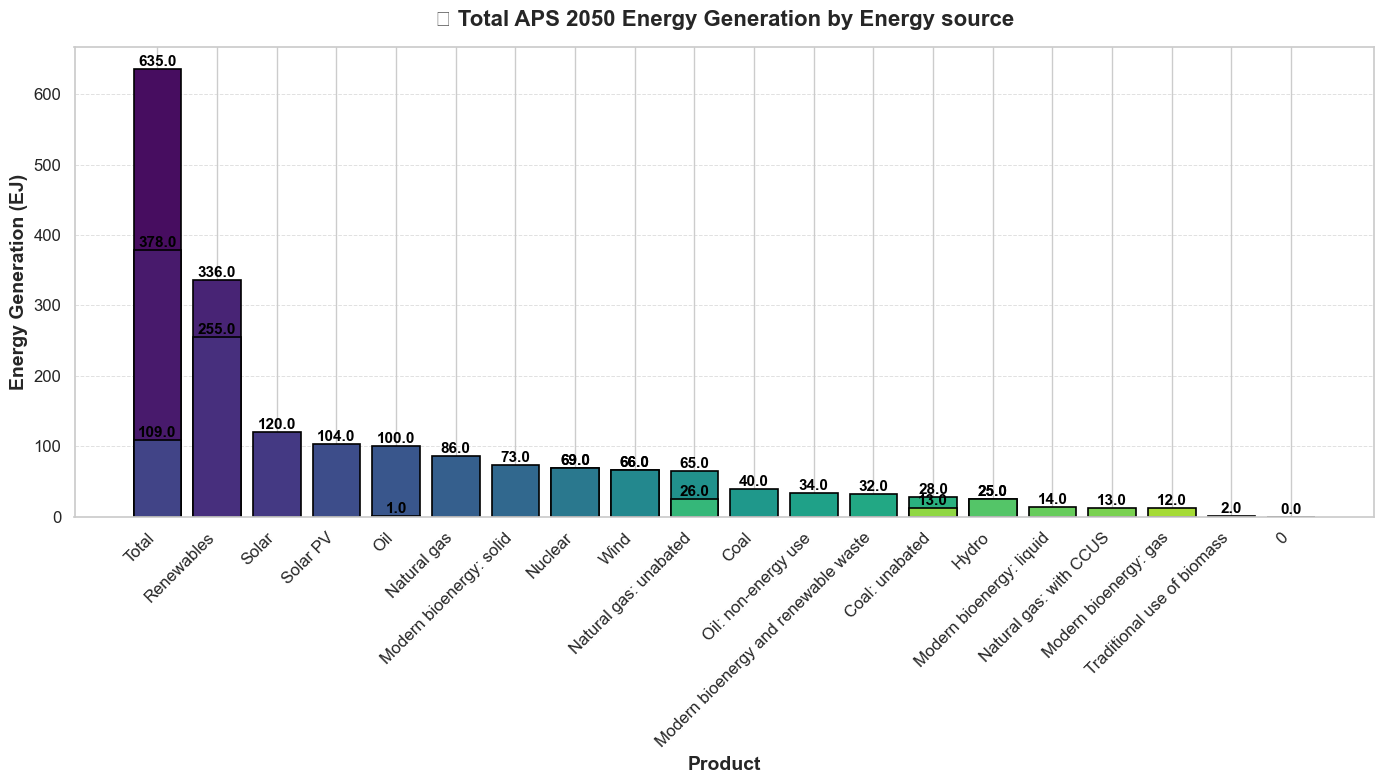

In [ ]:
# Set a modern Seaborn style
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Convert 'APS 2050' column to numeric
world_energy_supply["APS 2050"] = pd.to_numeric(world_energy_supply["APS 2050"], errors='coerce')

# Drop NaN values
world_energy_supply = world_energy_supply.dropna(subset=["APS 2050"])

# Sort products by energy generation
world_energy_supply = world_energy_supply.sort_values(by="APS 2050", ascending=False)

# Define color palette
colors = sns.color_palette("viridis", len(world_energy_supply))

# Create figure
plt.figure(figsize=(14, 8))

# Create bar chart with modern styling
bars = plt.bar(
    world_energy_supply["Product"], 
    world_energy_supply["APS 2050"], 
    color=colors, 
    edgecolor="black",  # Adds contrast
    linewidth=1.2
)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval, 
        f'{yval:.1f}', ha='center', va='bottom', 
        fontsize=11, fontweight='bold', color="black"
    )

# Formatting
plt.xlabel("Product", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("🔋 Total APS 2050 Energy Generation by Energy source", fontsize=16, fontweight='bold', pad=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle grid
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)


plt.tight_layout()

# Show the plot
plt.show()


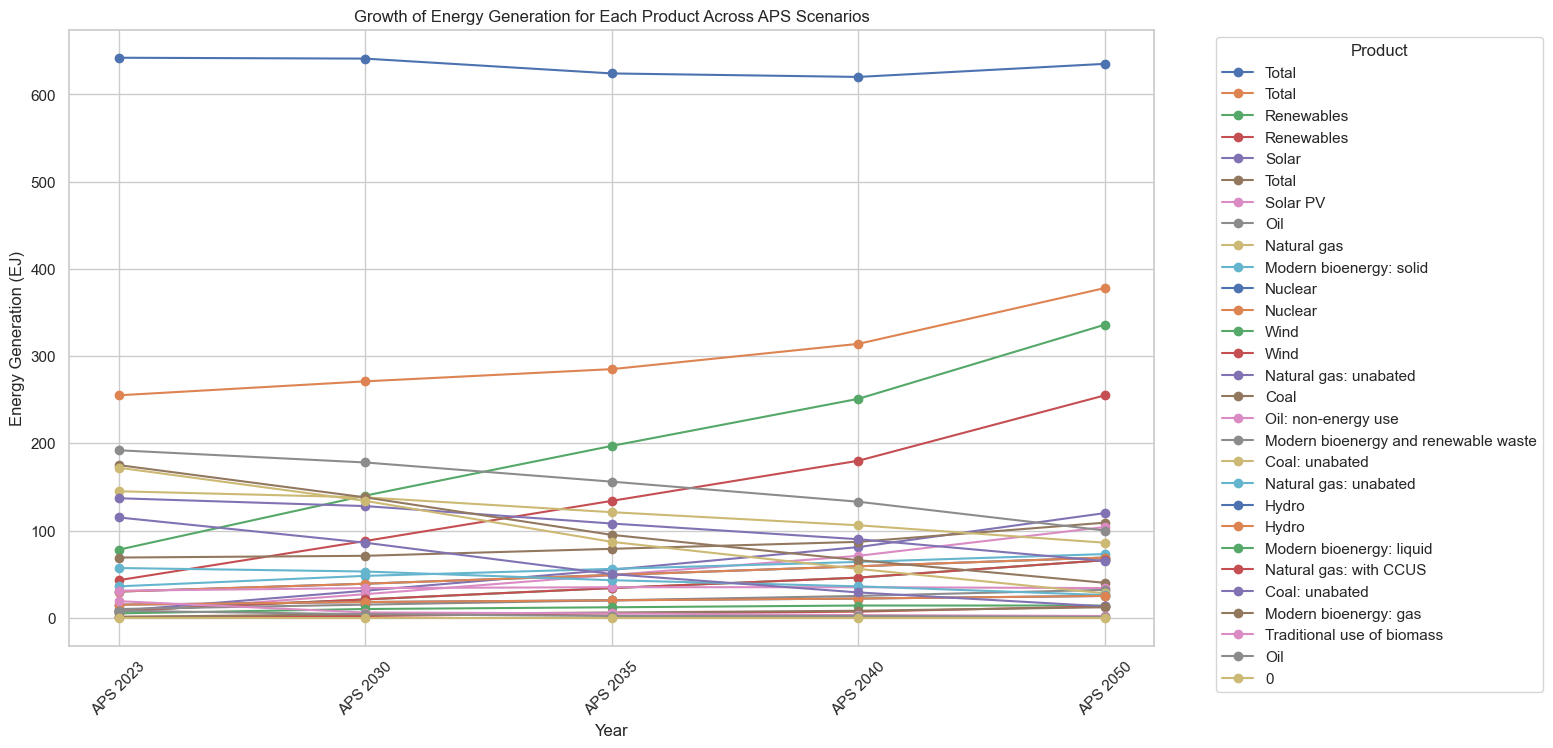

In [ ]:
# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Select APS columns for plotting
aps_columns = ["APS 2023", "APS 2030", "APS 2035", "APS 2040", "APS 2050"]

# Convert APS columns to numeric
world_energy_supply[aps_columns] = world_energy_supply[aps_columns].apply(pd.to_numeric, errors='coerce')

# Drop NaN values
world_energy_supply = world_energy_supply.dropna(subset=aps_columns)

# Plot
plt.figure(figsize=(14, 8))

# Loop through each product and plot its growth over APS years
for _, row in world_energy_supply.iterrows():
    plt.plot(aps_columns, row[aps_columns], marker='o', label=row["Product"])

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy Generation (EJ)")
plt.title("Growth of Energy Generation for Each Product Across APS Scenarios")
plt.xticks(rotation=45)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/128944603.py:76: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


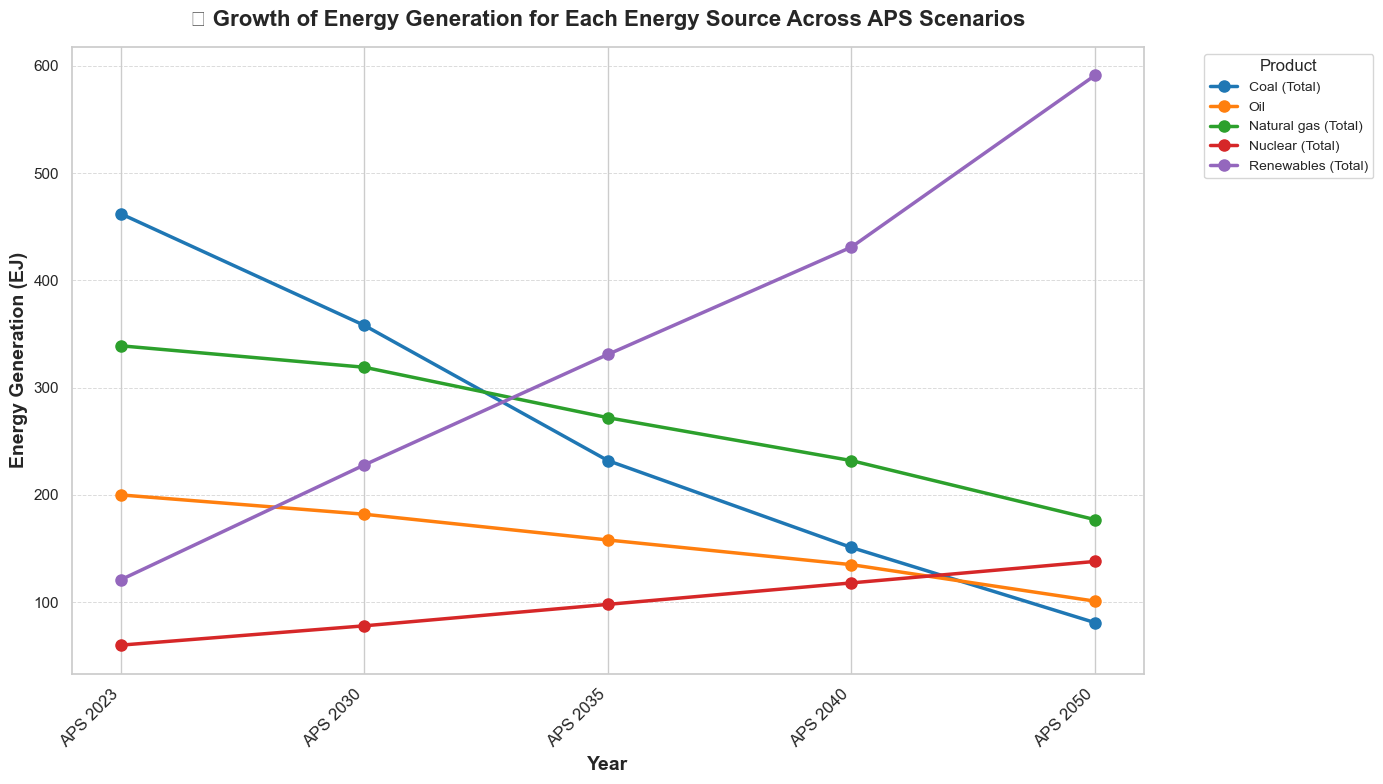

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Define APS columns for plotting
aps_columns = ["APS 2023", "APS 2030", "APS 2035", "APS 2040", "APS 2050"]

# Convert APS columns to numeric
world_energy_supply[aps_columns] = world_energy_supply[aps_columns].apply(pd.to_numeric, errors='coerce')

# Remove unwanted rows
exclude_rows = [
    "Modern bioenergy: solid", "Modern bioenergy: liquid", "Modern bioenergy: gas", 
    "Traditional use of biomass", "Natural gas: with CCUS", "Oil: non-energy use", 
    "Coal: with CCUS", "Total", "Hydrogen: low-emissions", "Hydrogen: high-emissions", 
    "0", "Modern bioenergy and renewable waste", "Ammonia", "Solar", "Wind", "Hydro", "Hydrogen",
    "Solar PV", "Wind"
]
df_filtered = world_energy_supply[~world_energy_supply["Product"].isin(exclude_rows)].copy()

# Merge specific rows
merge_pairs = {
    "Coal (Total)": ["Coal", "Coal: unabated"],
     "Oil": ["Oil", "Oil"],
    "Natural gas (Total)": ["Natural gas", "Natural gas: unabated"],
    "Nuclear (Total)": ["Nuclear", "Nuclear"], 
    "Renewables (Total)": ["Renewables", "Renewables"]  
}

# Create a new dataframe for merged results
df_combined = df_filtered.copy()

for new_name, old_names in merge_pairs.items():
    existing_products = [p for p in old_names if p in df_filtered["Product"].values]
    
    if len(existing_products) > 1:  
        merged_row = df_filtered[df_filtered["Product"].isin(existing_products)].iloc[:, 1:].sum().to_frame().T
        merged_row.insert(0, "Product", new_name)  
        
        # Remove old rows and add new merged row
        df_combined = df_combined[~df_combined["Product"].isin(existing_products)]
        df_combined = pd.concat([df_combined, merged_row], ignore_index=True)

# Set figure size
plt.figure(figsize=(14, 8))

# Use a distinct color palette
colors = sns.color_palette("tab10", len(df_combined))

# Loop through each product and plot its growth over APS years
for i, (_, row) in enumerate(df_combined.iterrows()):
    plt.plot(aps_columns, row[aps_columns], marker='o', linestyle='-', linewidth=2.5, markersize=8,
             label=row["Product"], color=colors[i])

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("📈 Growth of Energy Generation for Each Energy Source Across APS Scenarios", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Modern legend placement
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=True)

# Subtle grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()


plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/2625134331.py:46: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


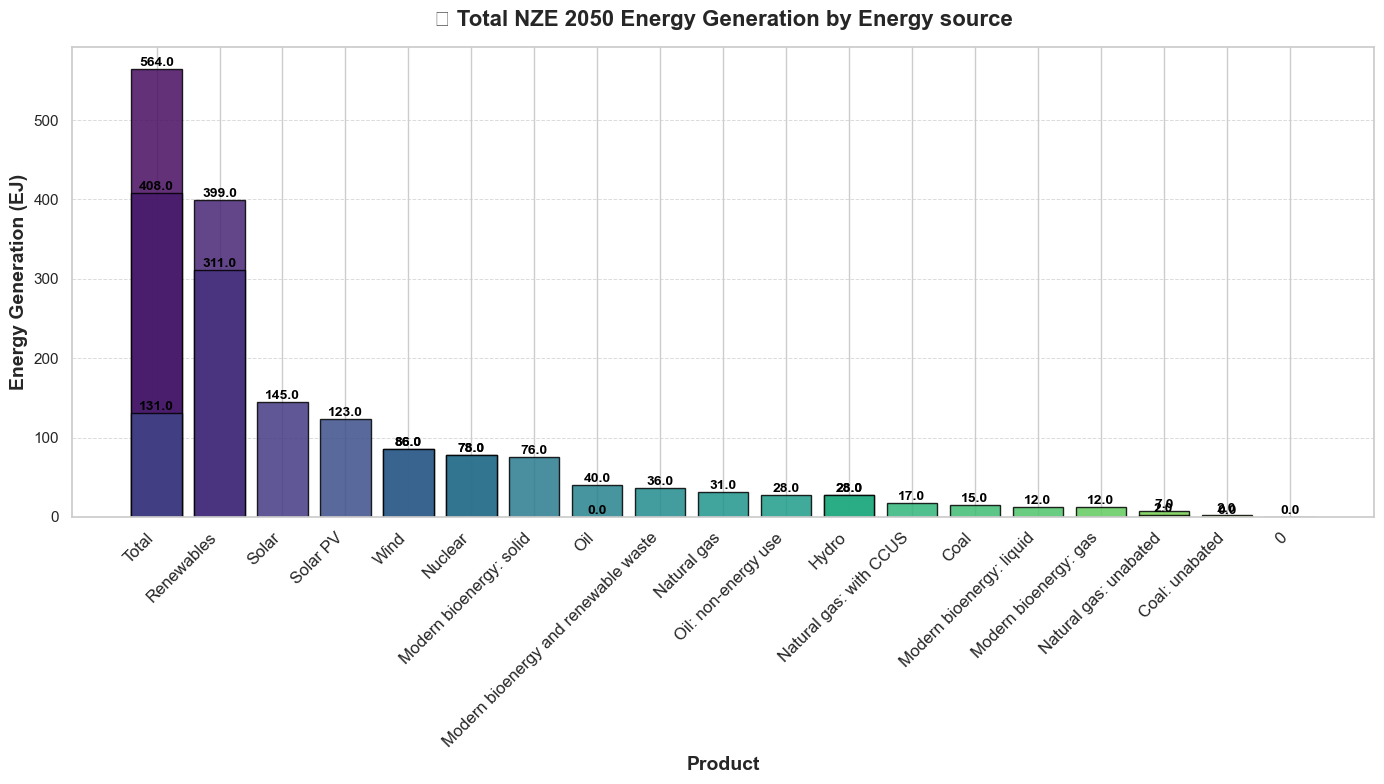

In [ ]:
# Set a modern Seaborn style
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Convert 'NZE 2050' column to numeric
world_energy_supply["NZE 2050"] = pd.to_numeric(world_energy_supply["NZE 2050"], errors='coerce')

# Drop NaN values 
world_energy_supply = world_energy_supply.dropna(subset=["NZE 2050"])

# Sort bars for better visualization
world_energy_supply = world_energy_supply.sort_values(by="NZE 2050", ascending=False)

# Create figure
plt.figure(figsize=(14, 8))

# Use a modern color palette
colors = sns.color_palette("viridis", len(world_energy_supply))

# Plot bars
bars = plt.bar(world_energy_supply["Product"], world_energy_supply["NZE 2050"], color=colors, edgecolor="black", alpha=0.85)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")

# Formatting
plt.xlabel("Product", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("🚀 Total NZE 2050 Energy Generation by Energy source", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid with modern styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/4212297538.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


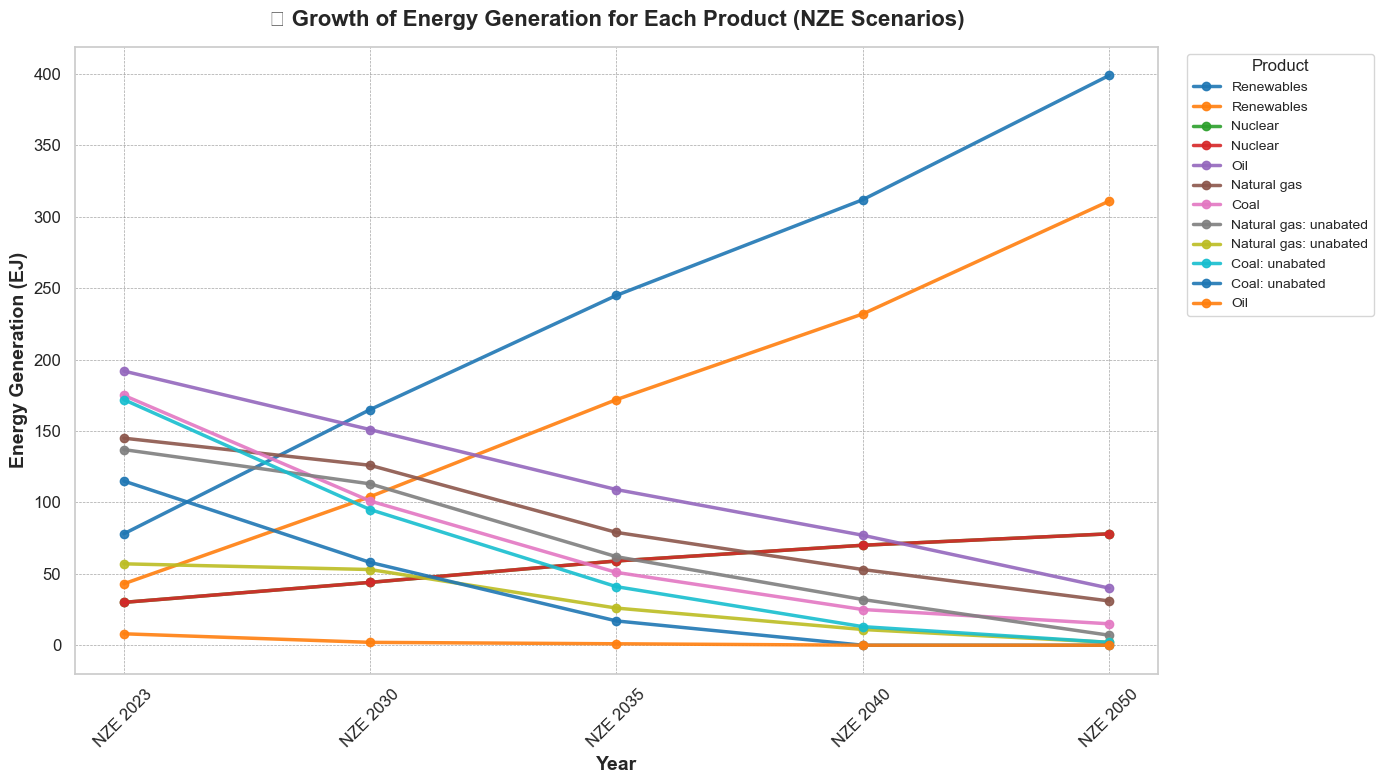

In [ ]:
# Set a modern Seaborn style
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Define the columns for NZE scenarios
nze_columns = ["NZE 2023", "NZE 2030", "NZE 2035", "NZE 2040", "NZE 2050"]

# Convert NZE columns to numeric
world_energy_supply[nze_columns] = world_energy_supply[nze_columns].apply(pd.to_numeric, errors='coerce')

# Remove unwanted rows
exclude_rows = [
    "Modern bioenergy: solid", "Modern bioenergy: liquid", "Modern bioenergy: gas", 
    "Traditional use of biomass", "Natural gas: with CCUS", "Oil: non-energy use", 
    "Coal: with CCUS", "Total", "Hydrogen: low-emissions", "Hydrogen: high-emissions", 
    "0", "Modern bioenergy and renewable waste", "Ammonia", "Solar", "Wind", "Hydro", "Hydrogen",
    "Solar PV", "Wind"
]
world_energy_supply_filtered = world_energy_supply[~world_energy_supply["Product"].isin(exclude_rows)]

# Drop NaN values in NZE columns
world_energy_supply_filtered = world_energy_supply_filtered.dropna(subset=nze_columns)

# Set a categorical color palette (more distinct colors)
colors = sns.color_palette("tab10", len(world_energy_supply_filtered))

# Plot
plt.figure(figsize=(14, 8))

# Loop through each product and plot its growth over NZE years
for i, (index, row) in enumerate(world_energy_supply_filtered.iterrows()):
    plt.plot(
        nze_columns, row[nze_columns], 
        marker='o', linestyle='-', linewidth=2.5, alpha=0.9, 
        label=row["Product"], color=colors[i % 10]  
    )

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("📈 Growth of Energy Generation for Each Product (NZE Scenarios)", fontsize=16, fontweight='bold', pad=15)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Soft grid

# Add a legend with better positioning
plt.legend(title="Product", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, frameon=True)

# Optimize layout
plt.tight_layout()

plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/2310058451.py:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


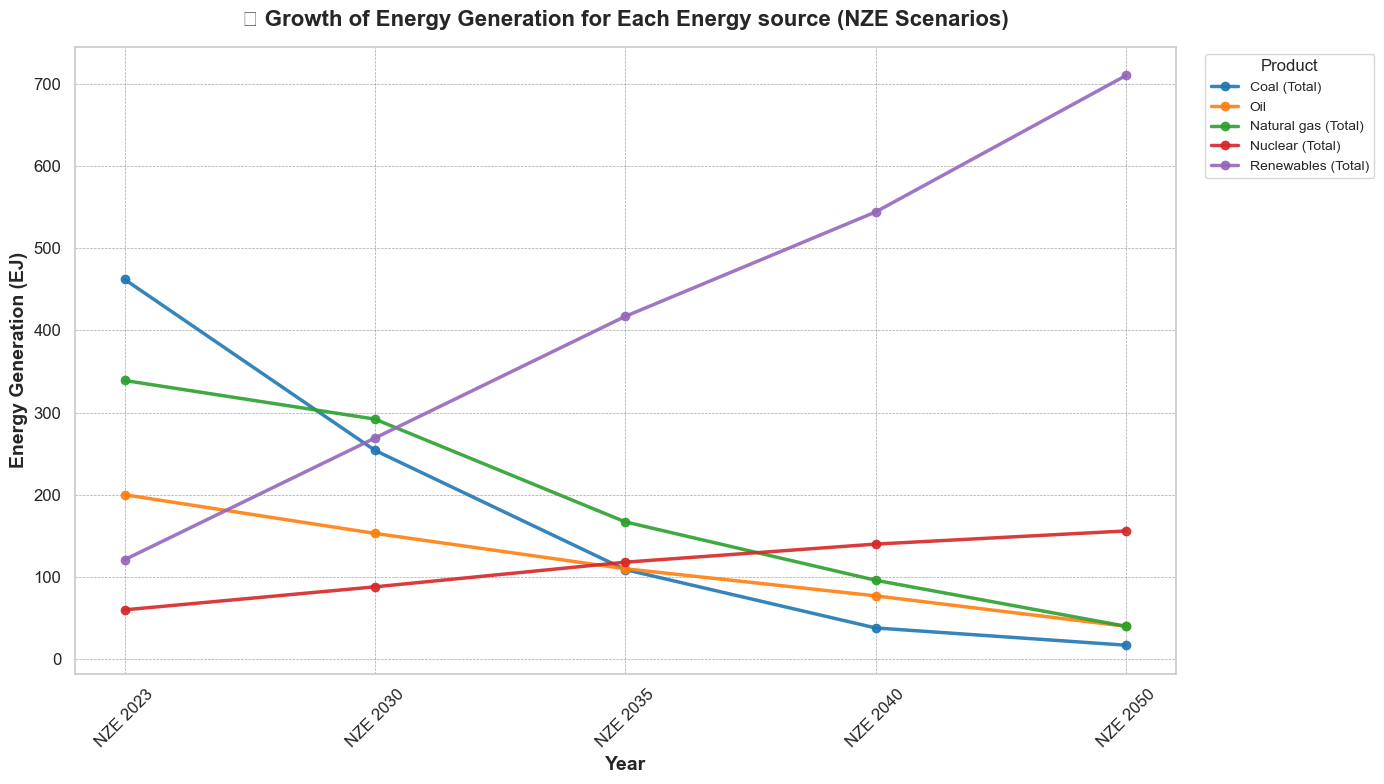

In [ ]:
# Set a modern Seaborn style
sns.set_theme(style="whitegrid")

# Ensure 'Product' column is treated as a string
world_energy_supply["Product"] = world_energy_supply["Product"].astype(str)

# Define the columns for NZE scenarios
nze_columns = ["NZE 2023", "NZE 2030", "NZE 2035", "NZE 2040", "NZE 2050"]

# Convert NZE columns to numeric
world_energy_supply[nze_columns] = world_energy_supply[nze_columns].apply(pd.to_numeric, errors='coerce')

# Remove unwanted rows
exclude_rows = [
    "Modern bioenergy: solid", "Modern bioenergy: liquid", "Modern bioenergy: gas", 
    "Traditional use of biomass", "Natural gas: with CCUS", "Oil: non-energy use", 
    "Coal: with CCUS", "Total", "Hydrogen: low-emissions", "Hydrogen: high-emissions", 
    "0", "Modern bioenergy and renewable waste", "Ammonia", "Solar", "Wind", "Hydro", "Hydrogen",
    "Solar PV", "Wind"
]
df_filtered = world_energy_supply[~world_energy_supply["Product"].isin(exclude_rows)].copy()

# Merge specific rows
merge_pairs = {
    "Coal (Total)": ["Coal", "Coal: unabated"],
    "Oil": ["Oil", "Oil"],
    "Natural gas (Total)": ["Natural gas", "Natural gas: unabated"],
    "Nuclear (Total)": ["Nuclear", "Nuclear"],  
    "Renewables (Total)": ["Renewables", "Renewables"] 
}

df_combined = df_filtered.copy()  # Create a copy to modify

for new_name, old_names in merge_pairs.items():
    existing_products = [p for p in old_names if p in df_filtered["Product"].values]
    
    if len(existing_products) > 1: 
        merged_row = df_filtered[df_filtered["Product"].isin(existing_products)].iloc[:, 1:].sum().to_frame().T
        merged_row.insert(0, "Product", new_name)
        
        # Remove old rows and add new merged row
        df_combined = df_combined[~df_combined["Product"].isin(existing_products)]
        df_combined = pd.concat([df_combined, merged_row], ignore_index=True)

# Drop NaN values in NZE columns
df_combined = df_combined.dropna(subset=nze_columns)

# Set a categorical color palette (more distinct colors)
colors = sns.color_palette("tab10", len(df_combined))

# Plot
plt.figure(figsize=(14, 8))

# Loop through each product and plot its growth over NZE years
for i, (index, row) in enumerate(df_combined.iterrows()):
    plt.plot(
        nze_columns, row[nze_columns], 
        marker='o', linestyle='-', linewidth=2.5, alpha=0.9, 
        label=row["Product"], color=colors[i % 10]  
    )

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Energy Generation (EJ)", fontsize=14, fontweight='bold')
plt.title("📈 Growth of Energy Generation for Each Energy source (NZE Scenarios)", fontsize=16, fontweight='bold', pad=15)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Soft grid

# Add a legend with better positioning
plt.legend(title="Product", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, frameon=True)

# Optimize layout
plt.tight_layout()

plt.show()


In [ ]:
world_electricity_supply = world_electricity_supply.dropna(how="all")  # Drops rows where all values are NaN
world_electricity_supply = world_electricity_supply.dropna(axis=1, how="all")  # Drops columns where all values are NaN
# Drop the specified columns
world_electricity_supply = world_electricity_supply.drop(columns=["Publication", "Scenario", "Category", "Flow", "Region", "Year", "Unnamed: 9", "Unnamed: 24", "NO", "NO.1", "NO.2", "NO.3", "NO.4", "NO.5",	"NO.6",	"NO.7",	"NO.8",	"NO.9", "NO.10",	"NO.11",	"NO.12",	"NO.13",	"NO.14"])
world_electricity_supply.fillna(0, inplace=True)
# Drop multiple rows by index
world_electricity_supply = world_electricity_supply.drop(index=[0,1,2,3,4])  


# Reset index after dropping the row 
world_electricity_supply = world_electricity_supply.reset_index(drop=True)

world_electricity_supply.head(30)

,Product,Unit,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Stated Policies Scenario.6,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2,Announced Pledges Scenario.3,Announced Pledges Scenario.4,Net Zero Emissions by 2050 Scenario,Net Zero Emissions by 2050 Scenario.1,Net Zero Emissions by 2050 Scenario.2,Net Zero Emissions by 2050 Scenario.3,Net Zero Emissions by 2050 Scenario.4
0,0,0,2010,2022,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050
1,Total,TWh,21 511,29 145,29 863,37 489,42 766,48 409,58 352,29 863,38 285,45 759,54 638,70 564,29 863,39 783,50 084,61 965,80 194
2,Renewables,TWh,4 209,8 567,9 029,17 577,24 930,31 802,42 770,9 029,19 897,30 828,41 505,58 611,9 029,23 337,39 128,52 821,70 963
3,Solar PV,TWh,32,1 294,1 612,6 452,10 689,14 912,21 557,1 612,7 512,13 673,19 816,28 996,1 612,9 212,17 645,24 846,34 069
4,Wind,TWh,342,2 120,2 336,5 024,7 535,9 492,12 347,2 336,5 938,9 548,12 734,18 289,2 336,7 114,12 608,17 293,23 940
5,Hydro,TWh,3 455,4 350,4 249,4 846,5 190,5 572,6 399,4 249,5 003,5 501,6 061,7 032,4 249,5 404,6 226,6 920,7 722
6,Modern bioenergy and renewable waste,TWh,309,691,714,1 081,1 237,1 402,1 758,714,1 231,1 652,2 084,2 782,714,1 256,1 889,2 445,3 054
7,Bioenergy: with CCUS,TWh,-,-,-,-,-,-,-,-,24,184,326,481,-,55,330,538,731
8,Concentrating solar power,TWh,2,14,18,25,58,115,238,18,40,174,410,844,18,93,332,731,1 327
9,Geothermal,TWh,68,97,100,147,206,271,384,100,169,261,355,567,100,246,398,529,739


In [819]:
# Drop rows where all values are NaN
world_electricity_supply = world_electricity_supply.dropna(how="all")  

# Drop columns where all values are NaN
world_electricity_supply = world_electricity_supply.dropna(axis=1, how="all")  


# Fill NaN values with 0
world_electricity_supply.fillna(0, inplace=True)

# Drop multiple rows by index
rows_to_drop = [2, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
world_electricity_supply = world_electricity_supply.drop(index=rows_to_drop)  

# Reset index after dropping the rows
world_electricity_supply = world_electricity_supply.reset_index(drop=True)

# Display the cleaned DataFrame
world_electricity_supply.head(50)


,Product,Unit,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Stated Policies Scenario.6,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2,Announced Pledges Scenario.3,Announced Pledges Scenario.4,Net Zero Emissions by 2050 Scenario,Net Zero Emissions by 2050 Scenario.1,Net Zero Emissions by 2050 Scenario.2,Net Zero Emissions by 2050 Scenario.3,Net Zero Emissions by 2050 Scenario.4
0,0,0,2010,2022,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050,2023,2030,2035,2040,2050
1,Total,TWh,21 511,29 145,29 863,37 489,42 766,48 409,58 352,29 863,38 285,45 759,54 638,70 564,29 863,39 783,50 084,61 965,80 194
2,Solar PV,TWh,32,1 294,1 612,6 452,10 689,14 912,21 557,1 612,7 512,13 673,19 816,28 996,1 612,9 212,17 645,24 846,34 069
3,Wind,TWh,342,2 120,2 336,5 024,7 535,9 492,12 347,2 336,5 938,9 548,12 734,18 289,2 336,7 114,12 608,17 293,23 940
4,Hydro,TWh,3 455,4 350,4 249,4 846,5 190,5 572,6 399,4 249,5 003,5 501,6 061,7 032,4 249,5 404,6 226,6 920,7 722
5,Modern bioenergy and renewable waste,TWh,309,691,714,1 081,1 237,1 402,1 758,714,1 231,1 652,2 084,2 782,714,1 256,1 889,2 445,3 054
6,Bioenergy: with CCUS,TWh,-,-,-,-,-,-,-,-,24,184,326,481,-,55,330,538,731
7,Concentrating solar power,TWh,2,14,18,25,58,115,238,18,40,174,410,844,18,93,332,731,1 327
8,Geothermal,TWh,68,97,100,147,206,271,384,100,169,261,355,567,100,246,398,529,739
9,Marine,TWh,1,1,1,3,15,38,87,1,3,20,46,100,1,10,30,57,112


In [ ]:
# Drop rows where all values are NaN
world_electricity_supply = world_electricity_supply.dropna(how="all")  

# Drop columns where all values are NaN
world_electricity_supply = world_electricity_supply.dropna(axis=1, how="all")  

# Fill NaN values with 0
world_electricity_supply.fillna(0, inplace=True)

# Drop multiple rows by index
rows_to_drop = [0,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
world_electricity_supply = world_electricity_supply.drop(index=rows_to_drop)  

# Reset index after dropping the rows
world_electricity_supply = world_electricity_supply.reset_index(drop=True)

world_electricity_supply.head(30)


,Product,Unit,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Stated Policies Scenario.6,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2,Announced Pledges Scenario.3,Announced Pledges Scenario.4,Net Zero Emissions by 2050 Scenario,Net Zero Emissions by 2050 Scenario.1,Net Zero Emissions by 2050 Scenario.2,Net Zero Emissions by 2050 Scenario.3,Net Zero Emissions by 2050 Scenario.4
0,Total,TWh,21 511,29 145,29 863,37 489,42 766,48 409,58 352,29 863,38 285,45 759,54 638,70 564,29 863,39 783,50 084,61 965,80 194
1,Solar PV,TWh,32,1 294,1 612,6 452,10 689,14 912,21 557,1 612,7 512,13 673,19 816,28 996,1 612,9 212,17 645,24 846,34 069
2,Wind,TWh,342,2 120,2 336,5 024,7 535,9 492,12 347,2 336,5 938,9 548,12 734,18 289,2 336,7 114,12 608,17 293,23 940
3,Hydro,TWh,3 455,4 350,4 249,4 846,5 190,5 572,6 399,4 249,5 003,5 501,6 061,7 032,4 249,5 404,6 226,6 920,7 722
4,Modern bioenergy and renewable waste,TWh,309,691,714,1 081,1 237,1 402,1 758,714,1 231,1 652,2 084,2 782,714,1 256,1 889,2 445,3 054
5,Bioenergy: with CCUS,TWh,-,-,-,-,-,-,-,-,24,184,326,481,-,55,330,538,731
6,Concentrating solar power,TWh,2,14,18,25,58,115,238,18,40,174,410,844,18,93,332,731,1 327
7,Geothermal,TWh,68,97,100,147,206,271,384,100,169,261,355,567,100,246,398,529,739
8,Marine,TWh,1,1,1,3,15,38,87,1,3,20,46,100,1,10,30,57,112
9,Nuclear,TWh,2 756,2 684,2 765,3 266,3 746,4 059,4 460,2 765,3 462,4 332,5 156,6 055,2 765,3 887,5 138,6 092,6 969


In [822]:
# Define the mapping of old column names to new column names
column_renames = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2040",
    "Stated Policies Scenario.6": "SPS 2050",
    "Announced Pledges Scenario": "APS 2023",
    "Announced Pledges Scenario.1": "APS 2030",
    "Announced Pledges Scenario.2": "APS 2035",
    "Announced Pledges Scenario.3": "APS 2040",
    "Announced Pledges Scenario.4": "APSs 2050",
    "Net Zero Emissions by 2050 Scenario": "NZE 2023",
    "Net Zero Emissions by 2050 Scenario.1": "NZE 2030",
    "Net Zero Emissions by 2050 Scenario.2": "NZE 2035",
    "Net Zero Emissions by 2050 Scenario.3": "NZE 2040",
    "Net Zero Emissions by 2050 Scenario.4": "NZE 2050"
}

# Rename the columns
world_electricity_supply = world_electricity_supply.rename(columns=column_renames)

# Display the renamed DataFrame
world_electricity_supply.head(20)


,Product,Unit,SPS 2010,SPS 2022,SPS 2023,SPS 2030,SPS 2035,SPS 2040,SPS 2050,APS 2023,APS 2030,APS 2035,APS 2040,APSs 2050,NZE 2023,NZE 2030,NZE 2035,NZE 2040,NZE 2050
0,Total,TWh,21 511,29 145,29 863,37 489,42 766,48 409,58 352,29 863,38 285,45 759,54 638,70 564,29 863,39 783,50 084,61 965,80 194
1,Solar PV,TWh,32,1 294,1 612,6 452,10 689,14 912,21 557,1 612,7 512,13 673,19 816,28 996,1 612,9 212,17 645,24 846,34 069
2,Wind,TWh,342,2 120,2 336,5 024,7 535,9 492,12 347,2 336,5 938,9 548,12 734,18 289,2 336,7 114,12 608,17 293,23 940
3,Hydro,TWh,3 455,4 350,4 249,4 846,5 190,5 572,6 399,4 249,5 003,5 501,6 061,7 032,4 249,5 404,6 226,6 920,7 722
4,Modern bioenergy and renewable waste,TWh,309,691,714,1 081,1 237,1 402,1 758,714,1 231,1 652,2 084,2 782,714,1 256,1 889,2 445,3 054
5,Bioenergy: with CCUS,TWh,-,-,-,-,-,-,-,-,24,184,326,481,-,55,330,538,731
6,Concentrating solar power,TWh,2,14,18,25,58,115,238,18,40,174,410,844,18,93,332,731,1 327
7,Geothermal,TWh,68,97,100,147,206,271,384,100,169,261,355,567,100,246,398,529,739
8,Marine,TWh,1,1,1,3,15,38,87,1,3,20,46,100,1,10,30,57,112
9,Nuclear,TWh,2 756,2 684,2 765,3 266,3 746,4 059,4 460,2 765,3 462,4 332,5 156,6 055,2 765,3 887,5 138,6 092,6 969


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/2741941900.py:41: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


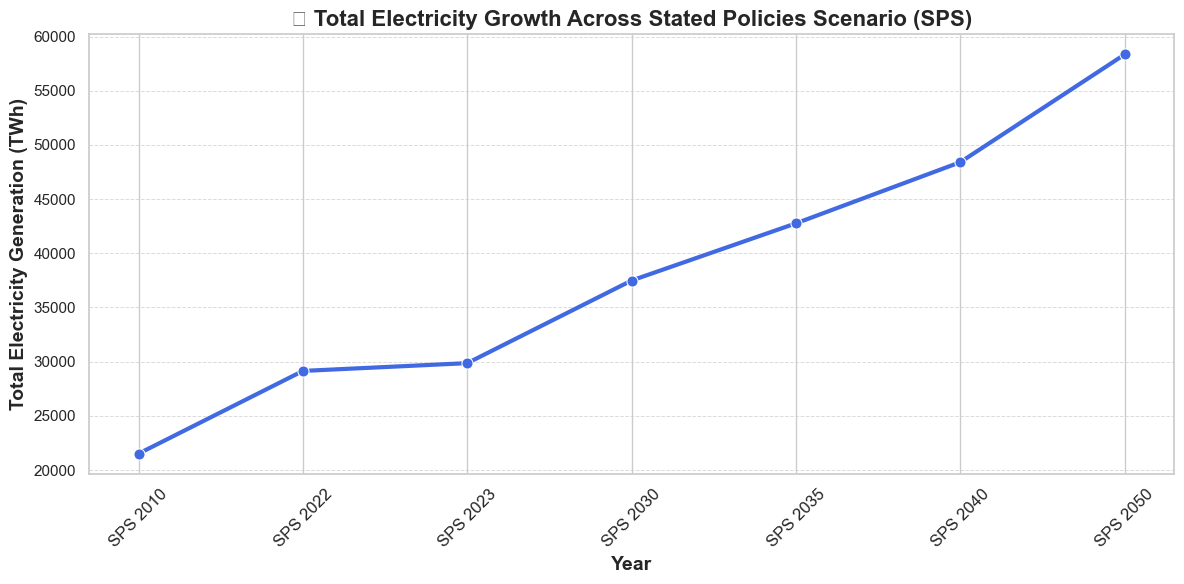

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Convert numeric columns 
sps_columns = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2040", "SPS 2050"]

# Ensure numeric conversion
world_electricity_supply[sps_columns] = (
    world_electricity_supply[sps_columns]
    .replace({" ": ""}, regex=True) 
    .apply(pd.to_numeric, errors="coerce")
)

# Filter for "Total" electricity generation
total_electricity = world_electricity_supply[world_electricity_supply["Product"] == "Total"]

# Extract values for plotting
years = sps_columns
values = total_electricity.iloc[0][sps_columns]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=values, marker="o", linestyle="-", linewidth=3, markersize=8, color="royalblue")

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Total Electricity Generation (TWh)", fontsize=14, fontweight='bold')
plt.title("⚡ Total Electricity Growth Across Stated Policies Scenario (SPS)", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid for clarity
plt.grid(axis='y', linestyle="--", linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/3110025991.py:44: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


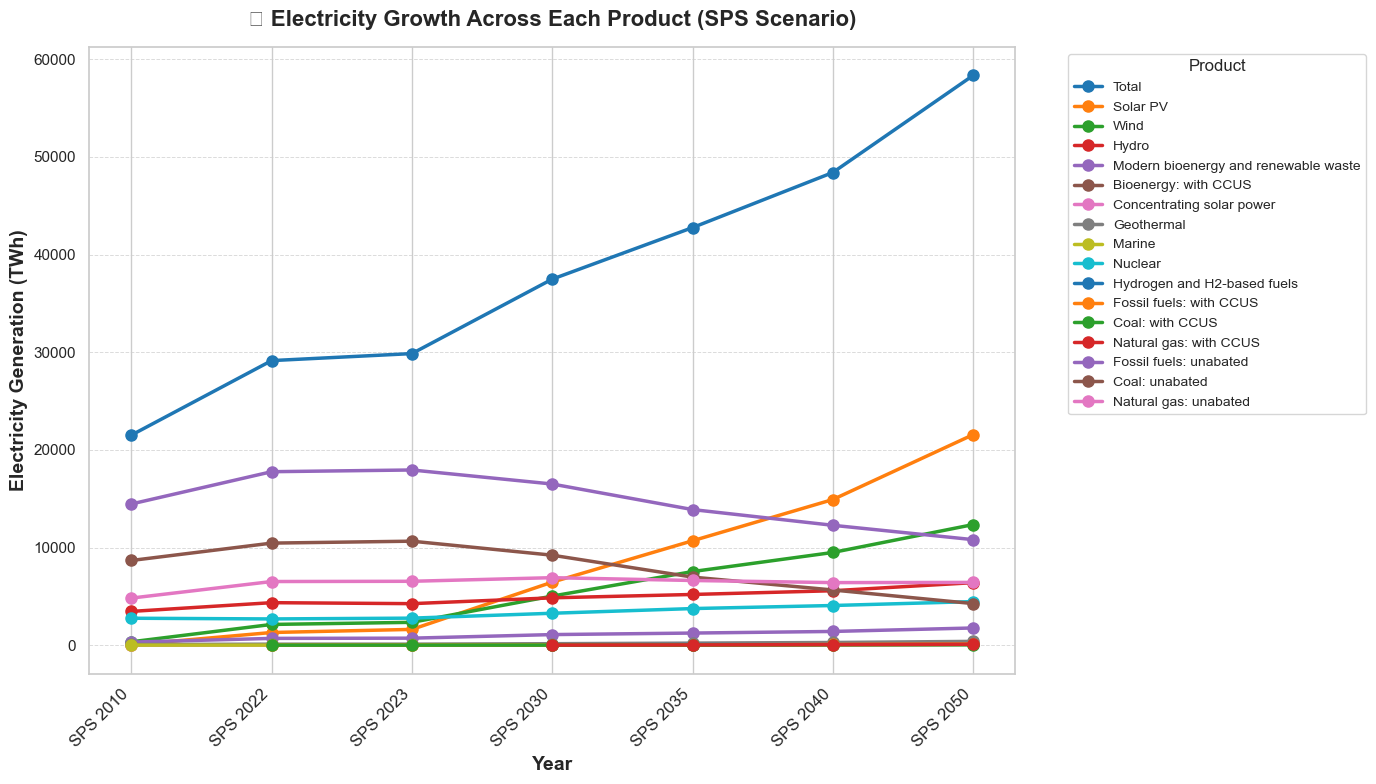

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Define SPS columns
sps_columns = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2040", "SPS 2050"]

# Convert numeric columns (removing spaces)
world_electricity_supply[sps_columns] = (
    world_electricity_supply[sps_columns]
    .replace({" ": ""}, regex=True) 
    .apply(pd.to_numeric, errors="coerce")
)

# Set figure size
plt.figure(figsize=(14, 8))

# Use a distinct color palette
colors = sns.color_palette("tab10", len(world_electricity_supply))

# Loop through each product and plot its growth over SPS years
for i, (_, row) in enumerate(world_electricity_supply.iterrows()):
    plt.plot(sps_columns, row[sps_columns], marker='o', linestyle='-', linewidth=2.5, markersize=8,
             label=row["Product"], color=colors[i % len(colors)])  

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Electricity Generation (TWh)", fontsize=14, fontweight='bold')
plt.title("⚡ Electricity Growth Across Each Product (SPS Scenario)", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Modern legend placement
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=True)

# Subtle grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()


plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_10584/274555381.py:48: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


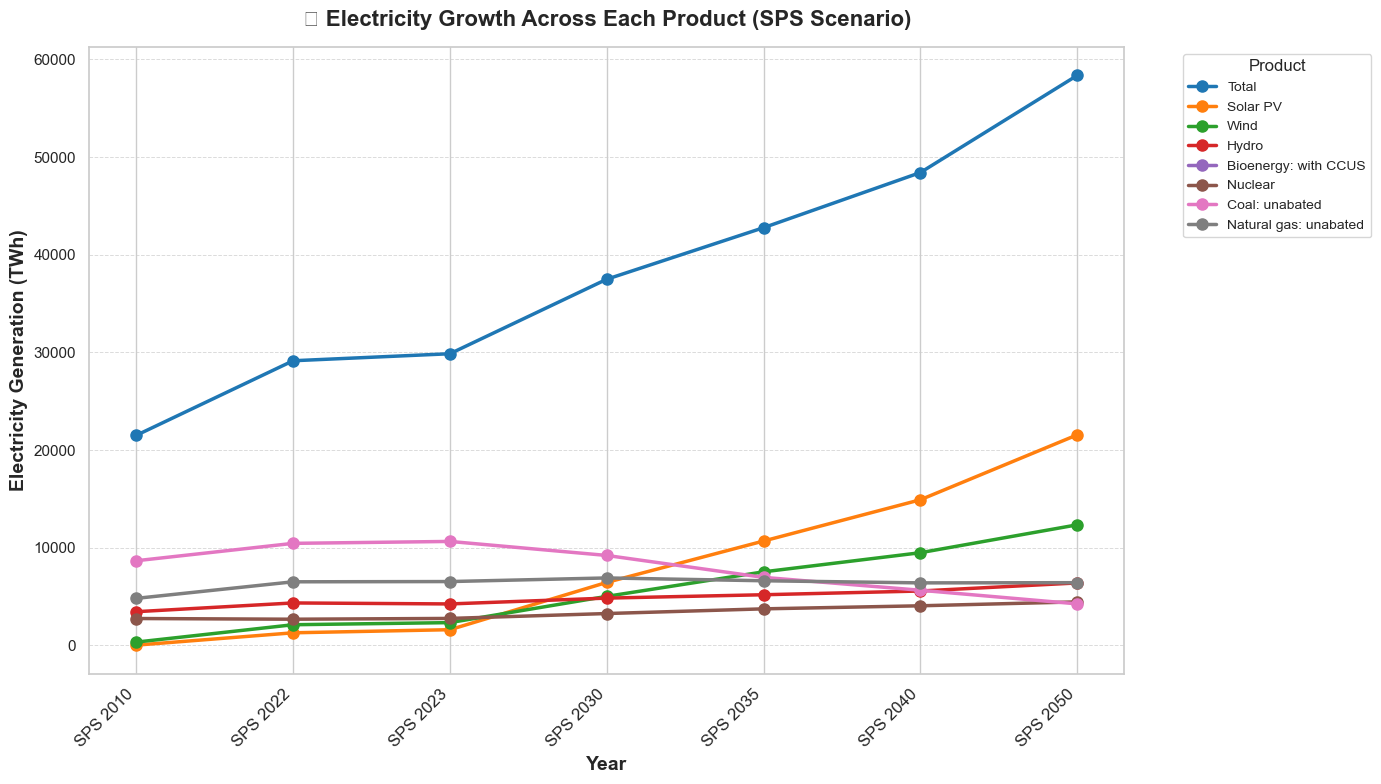

In [ ]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid")

# Define SPS columns
sps_columns = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2040", "SPS 2050"]

# Convert numeric columns
world_electricity_supply[sps_columns] = (
    world_electricity_supply[sps_columns]
    .replace({" ": ""}, regex=True) 
    .apply(pd.to_numeric, errors="coerce")
)

# Remove specified rows
exclude_products = ["Natural gas: with CCUS", "Coal: with CCUS", "Fossil fuels: unabated","Fossil fuels: with CCUS", "Marine", "Hydrogen and H2-based fuels", "Geothermal", "Concentrating solar power", "Modern bioenergy and renewable waste"]
world_electricity_supply_filtered = world_electricity_supply[~world_electricity_supply["Product"].isin(exclude_products)]

# Set figure size
plt.figure(figsize=(14, 8))

# Use a distinct color palette
colors = sns.color_palette("tab10", len(world_electricity_supply_filtered))

# Loop through each product and plot its growth over SPS years
for i, (_, row) in enumerate(world_electricity_supply_filtered.iterrows()):
    plt.plot(sps_columns, row[sps_columns], marker='o', linestyle='-', linewidth=2.5, markersize=8,
             label=row["Product"], color=colors[i % len(colors)])  # Cycle through colors

# Formatting
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Electricity Generation (TWh)", fontsize=14, fontweight='bold')
plt.title("⚡ Electricity Growth Across Each Product (SPS Scenario)", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Modern legend placement
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=True)

# Subtle grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Optimize layout
plt.tight_layout()

plt.show()


In [833]:
world_electricity_supply.to_csv('world_electricity_supply_cleaned.csv', index=False)

In [834]:
world_energy_supply.to_csv('world_energy_supply_cleaned.csv', index=False)